# 3. 데이터 전처리 이해와 실무
## 3.1 데이터 변환 : 특징 생성
### 특징 생성 (Feature Creation)
- 원본 데이터의 조합/변환 등을 기반하여 새로운 특징들을 구축 및 생성하는 방법  
=> 원본 데이터로 **특징을 새롭게 생성**하여 분석 과정 내 **성능과 효율성** 확보하고자 함
#### 목적 및 필요성
- 품질 확보 : 가공을 거치지 않은 Raw 데이터 활용 기반의 모델링은 품질 확보 어려움
- 최적화된 형태 변환 : 효과적인 Feature를 확보하는 것이 데이터 분석 내 가장 중요한 과정임
### 특징 생성 방안
1. 범주 인코딩
- 크게 Nominal(순서가 없는)과 Ordinal(순서가 있는) 형식으로 나뉘는 범주형 변수
- **숫자가 아닌 범주 변수 값을 숫자로 표현**하고 모델링에 적용하기 위한 과정
2. 결합 및 분해
- 데이터 셋의 **변수들의 조합을 기반**으로 새로운 특징을 구축하는 방법
- 변수 간의 **연산 혹은 분해**를 통해 새로운 특징을 구축하고 입력 변수로 모델링에 적용
3. 차원 축소
- 원본 데이터로부터 새로운 특징의 집합을 생성하는 것
- **고차원** 원시 데이터 셋을 **저차원으로 차원 축소**하도록 새로운 특징을 생성하는 방식
#### 1. 범주 인코딩
범주형 데이터의 알고리즘 적용을 위한 수치형 변환
##### One-hot Encoding
- 순서의 의미를 지니지 않은 범주형 변수를 처리하는 대표적 방법
- **k개의 범주**를 지닌 범주형 변수를 **k개의 변수**로 변환
#### 2-1. 결합 기반 특징 생성
변수 간의 결합을 통해 새로운 의미를 지닌 특징을 생성
- Add / Divide / Subtract / Multiply
#### 2-2. 분해 기반 특징 생성
변수의 분해를 통해 새로운 의미를 지닌 특징을 생성
- 특정 변수 활용 기반의 새로운 의미를 파악할 수 있는 특징을 생성하는 방법
- 도메인 지식 및 일반적 개념 기반으로 생성 가능
ex) 시간 -> 시간대, 요일 등..
#### 3. 차원 축소 목적 특징 생성
3-1. 변수들이 지닌 정보를 최대한 확보하는 저차원 데이터로 생성
##### PCA(Principal Component Analysis)
- 서로 연관된 변수들이 관측되었을 때, 원본 데이터 분산 기반의 특징을 생성
- 주성분 간의 서로 독립을 이루도록 구성 (상관관계가 없도록 구성)
3-2. 군집 분석 기반의 고차원 데이터를 하나의 특징으로 차원 축소
##### Featurization via Clustering
- 고차원 데이터를 군집 분석을 기반으로 특징의 개수를 하나의 특징(군집 결과)으로 축소
- 이렇게 획득한 군집 결과 특징을 분류/회귀 등 문제 해결을 위한 입력 변수로 할용(Stacking 방법)
- 즉, 원본 데이터 내 **여러 개의 특징을 하나의 특징**으로 축소하여 **모델 연산 비용 감소 추구**

## 실습
샘플 데이터 필요

In [1]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("./data/encoding_sample_data.csv", encoding='cp949')
data.head()

In [ ]:
data['city'].value_counts()

### 1. OneHot Encoding

In [ ]:
# city라는 범주형 변수 one_hot Encoding
# Pandas의 get_dummies 함수를 활용 쉽게 구혀 ㄴ가능

encoding_data = data.copy()
encoding_data = pd.get_dummies(encoding_data, columns=['city'])
encoding_data.head()

### 2. 결합 및 분해 기반 특징 생성

In [ ]:
# 시간대 별 파악 목적
creation_data = data.copy()
creation_data.info()

In [ ]:
# date 컬럼을 datetime 형식으로 변환
creation_data['date'] = pd.to_datetime(creation_data['date'])
creation_data.head()

In [ ]:
creation_data.info()

In [ ]:
creation_data['year'] = creation_data['date'].dt.year #연도
creation_data['month'] = creation_data['date'].dt.month #월
creation_data['day'] = creation_data['date'].dt.day #일
creation_data['hour'] = creation_data['date'].dt.hour #시간
creation_data['dayofweek'] = creation_data['date'].dt.dayofweek #요일 (월 = 0)
creation_data.head()

In [ ]:
# AM PM
creation_data['ampm'] = 'AM'
creation_data.loc[creation_data['hour'] > 12, 'ampm'] = 'PM'
creation_data

### 3. 차원 축소 기반 특징 생성 (1) : PCA (주성분 분석)
- 여러 개의 변수를 지닌 고차원 데이터를 저차원으로 변환하도록 주성분들을 생성하는 알고리즘
- 원 변수들이 지닌 정보를 최대한 확보하는 저차원 데이터로 생성하는 방법

In [2]:
cancer = pd.read_csv('./data/wdbc.data', header=None)

# 데이터 컬럼명 지정
cancer.columns = [
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se",
    "perimeter_se", "texture_worst", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
    "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", 
    "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# ID를 Index화
cancer = cancer.set_index('id')
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
# input 및 Target 구분
input_df = cancer.drop(['diagnosis'], axis=1)
print(np.shape(input_df))

target_df = cancer[['diagnosis']]
print(np.shape(target_df))

(569, 30)
(569, 1)


In [5]:
# 30개의 독립변수로 이루어진 데이터를 주성분 분석
# 주성분 분석 수행 이전, 각 변수의 스케일이 서로 다르기 때문에 표준화 수행
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

std_scaler.fit(input_df)
input_scaled = std_scaler.transform(input_df)

input_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [6]:
# 주성분 분석 수행
from sklearn.decomposition import PCA

# 두 개 주성분만 유지시키도록 수행
# 30개 변수의 데이터를 2개의 주성분으로 남도록 변환
pca = PCA(n_components=2)
pca.fit(input_scaled)
X_pca = pca.transform(input_scaled)
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [7]:
# PCA 수행된 input 데이터 확인
X_pca_df = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])
X_pca_df

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


- 30개의 변수를 지닌 데이터가 2개의 특징들로 압축되었음

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

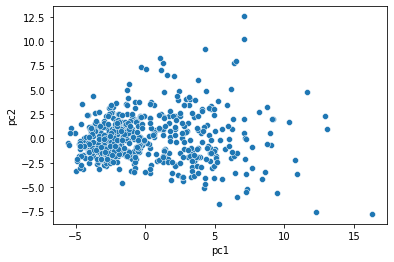

In [11]:
# 산점도로 2개의 주성분을 시각화
ax = sns.scatterplot(x='pc1', y='pc2', data=X_pca_df)

In [13]:
# Target과 확인을 위해 주성분 분석을 수행한 Input 데이터와 기존 Target 데이터를 Merge
target_df = target_df.reset_index()
pca_df = pd.merge(X_pca_df, target_df, left_index=True, right_index=True, how='inner')
pca_df = pca_df[['pc1', 'pc2', 'diagnosis']]
pca_df

,pc1,pc2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


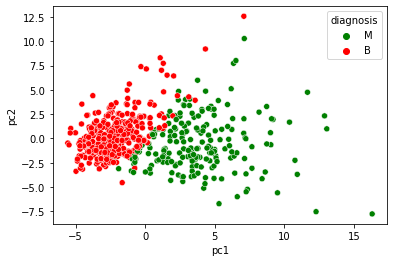

In [14]:
# 클래스를 색깔로 구분하여 처음 두개의 주성분으로 Target과 비교
ax = sns.scatterplot(x='pc1', y='pc2', hue='diagnosis', data=pca_df, palette=['green', 'red'])

- 실제 모델링에 적용하기 위해 효율적으로 활용 가능한 주성분 분석
- 특히, record 및 컬럼이 많은 경우 모델링 연산비용이 많이 들게 되므로 효율적인 차원 축소 기반의 특징을 생성하는 것이 분석 과정 내 필요한 과정

- 주성분을 선택하는 다른 방안
- 유지시킬 주성분 개수가 아닌 분산의 설명가능 수준을 비율로 선택 가능
    - pca = PCA(n_components=0.8):
    - 주성분의 수는 전체 분산의 최소 80% 수준에서 자동으로 선택
- 이를 통해 수치를 변경하면서 추출되는 주성분의 수 확인 가능하며, 이는 분산에 기초한 주성분 개수를 선택하는 부분에서 얼마나 많은 주성분을 사용할 것인지 확인해야 할 때 사용 가능

In [15]:
# 전체 분산의 최소 80% 수준에서 설명하는 수준의 주성분 확보
pca = PCA(n_components=0.8)
pca.fit(input_scaled)
X_pca = pca.transform(input_scaled)
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

,0,1,2,3,4
0,9.192837,1.948583,-1.123166,3.633731,-1.195110
1,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546747
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723
566,1.256179,-1.902297,0.562731,-2.089227,1.809991
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742


### 3. 차원 축소 기반 특징 생성 (2) : clustering (군집 분석)
- 여러 개의 변수를 하나의 변수(군집결과)로 변환 차원 축소

In [16]:
from sklearn.cluster import KMeans

In [17]:
# 일부 변수만 선택 (30개 변수 중 15개의 변수만 임의로 선정)
subset_df = input_df.iloc[:, 0:15]
subset_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,texture_worst,smoothness_se
id,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903


In [18]:
std_scaler.fit(subset_df)
subset_input_scaled = std_scaler.transform(subset_df)
subset_input_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.83303087,
         2.48757756, -0.21400165],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  0.26332697,
         0.74240195, -0.60535085],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  0.8509283 ,
         1.18133606, -0.29700501],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.27669279,
         0.1806983 , -0.37934168],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.43852964,
         1.0095027 , -0.17299998],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.15744905,
        -0.46615196,  0.04934236]])

In [19]:
# K-means 클러스터링 활용
# 군집 Label 수 설정
k = 5
model = KMeans(n_clusters=k, random_state=10)

In [20]:
model.fit(subset_input_scaled)

target_df['cluster'] = model.fit_predict(subset_input_scaled)

c:\Users\zxwlg\miniconda3\envs\dicom\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\zxwlg\miniconda3\envs\dicom\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [21]:
target_df

,index,id,diagnosis,cluster
0,0,842302,M,0
1,1,842517,M,2
2,2,84300903,M,2
3,3,84348301,M,4
4,4,84358402,M,2
...,...,...,...,...
564,564,926424,M,0
565,565,926682,M,2
566,566,926954,M,2
567,567,927241,M,0


In [24]:
pd.crosstab(target_df.diagnosis, target_df.cluster)

cluster,0,1,2,3,4
diagnosis,,,,,
B,0,111,0,229,17
M,36,5,93,26,52


- 임의의 15개 변수만을 활용한 하나의 특징(군집 결과)이 Target 구분에 효과적일 것임을 예측 가능함
- 이처럼 많은 변수를 하나의 특징으로 구성하고, 입력 데이터의 차원을 줄인다면 모델 연산 비용 절감에 효과적